## Lending Club Case Study

#### 1. Data Understanding/Inspection

In [1]:
#importing required libraries along with Filter Warnings -Ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
#Reading data from loan.csv file
lending_df=pd.read_csv("C:/Users/Jyotsana/Vijay/loan.csv")

In [3]:
#Count of Rows and Columns 
lending_df.shape

(39717, 111)

In [4]:
#Checking top 5 rows 
lending_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#As Number of Columns and Rows are huge setting the max display option to None
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 2. Data Cleaning

In [6]:
#Identify Columns with missing values and storing it under missing_col_perc with % 
missing_col_perc = (1-(lending_df.isnull().sum()  / len(lending_df))).sort_values(ascending=False)

In [7]:
missing_col_perc[missing_col_perc <1]

last_credit_pull_d                0.999950
title                             0.999723
tax_liens                         0.999018
revol_util                        0.998741
collections_12_mths_ex_med        0.998590
chargeoff_within_12_mths          0.998590
last_pymnt_d                      0.998212
pub_rec_bankruptcies              0.982451
emp_length                        0.972934
emp_title                         0.938087
desc                              0.674195
mths_since_last_delinq            0.353375
mths_since_last_record            0.070146
next_pymnt_d                      0.028703
num_op_rev_tl                     0.000000
mths_since_recent_bc              0.000000
mths_since_recent_bc_dlq          0.000000
mths_since_recent_inq             0.000000
mths_since_recent_revol_delinq    0.000000
num_accts_ever_120_pd             0.000000
num_actv_bc_tl                    0.000000
num_actv_rev_tl                   0.000000
num_bc_sats                       0.000000
num_bc_tl  

In [8]:
#Result columns with more than 50% valid data are required for analysis, rest all can be removed 
lending_df = lending_df.dropna(how='any',axis=1,thresh=lending_df.shape[0]*0.5)
lending_df.shape

(39717, 54)

In [9]:
#From the same result we can remove null values from columns having 98% good data
lending_df= lending_df.dropna(how='any',axis=0,thresh=lending_df.shape[1]*0.98)
lending_df.shape

(38121, 54)

In [10]:
#Get Unique Value count for remaining missing value columns and display the columns with one Unique Value
UniqueValue_column_count = lending_df.nunique().sort_values()
UniqueValue_column_count[UniqueValue_column_count == 1]

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
initial_list_status           1
collections_12_mths_ex_med    1
pymnt_plan                    1
dtype: int64

In [11]:
#Dropping columns containing one Unique Value as they are not useful for our analysis 
lending_df.drop(UniqueValue_column_count[UniqueValue_column_count == 1].index, axis=1, inplace=True)
lending_df.shape

(38121, 45)

In [12]:
#Display the top 15 columns with more Unique Value to identify which columns are no more required
UniqueValue_column_count.sort_values(ascending=False).head(15)

id                 38121
member_id          38121
url                38121
total_pymnt        36423
total_pymnt_inv    36101
total_rec_int      33931
last_pymnt_amnt    33756
emp_title          28735
desc               25851
revol_bal          21289
title              18918
installment        14997
funded_amnt_inv     8043
total_rec_prncp     7616
annual_inc          5081
dtype: int64

In [13]:
# Dropping below mentioned columns 
# member_id --> Both ID and member_id are unique and we can use either one of them and drop other one.
# emp_title & title are having lot of unique values and are just text so it is not required to analyse the data
#earliest_cr_line , last_pymnt_d , last_credit_pull_d
lending_df.drop(['member_id','emp_title','title','earliest_cr_line','last_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)
lending_df.shape

(38121, 39)

In [14]:
#Now checking whether if any data can be extracted from Url, if not we can drop it 
lending_df.url.head(10)

0     https://lendingclub.com/browse/loanDetail.acti...
1     https://lendingclub.com/browse/loanDetail.acti...
3     https://lendingclub.com/browse/loanDetail.acti...
4     https://lendingclub.com/browse/loanDetail.acti...
5     https://lendingclub.com/browse/loanDetail.acti...
6     https://lendingclub.com/browse/loanDetail.acti...
7     https://lendingclub.com/browse/loanDetail.acti...
8     https://lendingclub.com/browse/loanDetail.acti...
9     https://lendingclub.com/browse/loanDetail.acti...
10    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object

In [15]:
#URL has nothing much and can be removed 
lending_df.drop(['url'], axis=1, inplace=True)
lending_df.shape

(38121, 38)

In [16]:
#Checking for duplicate rows, which have to be deleted 
lending_df.duplicated().sum()

0

In [17]:
# Dropping rows with More than 10 null values
lending_df = lending_df.dropna(thresh=10)
lending_df.shape

(38121, 38)

In [18]:
#Get the existing Data type and based on the column, we will convert to required data type for analysis
lending_df.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
desc                        object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

In [19]:
# Now we need to remove % from int_rate & revol_util  and convert to float for analysis 
lending_df['int_rate'] = lending_df.int_rate.str.strip('%').astype(float)
lending_df['revol_util'] = lending_df.revol_util.str.strip('%').astype(float)

In [20]:
#Now we need  to convert issue_d to Date Formart MM-YYYY which can help in deriving the Month and Year for data analysis 
lending_df['issue_d'] = pd.to_datetime(lending_df.issue_d, format='%b-%y')

In [21]:
#Now we need  to update the year value to YYYY so it can help in analysis
lending_df['issue_d'] = lending_df['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [22]:
#Getting the latest Data types
lending_df.dtypes

id                                  int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
desc                               object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
inq_last_6mths                      int64
open_acc                            int64
pub_rec                           

#### Deriving new columns

In [23]:
#Using issue_d we can extract Month and Year 
lending_df['issue_d_year'] = lending_df.issue_d.dt.year
lending_df['issue_d_month'] = lending_df.issue_d.dt.strftime('%b')

#### Binning the variables

In [24]:
#Defining Function to Create Bins for Continous Variables 
def create_bins_val(lower_bound, upper_bound, quantity):
 rang = [] 
 labl= []
 width = round((upper_bound - lower_bound)/quantity)
 for low in range(lower_bound,lower_bound + quantity*width + 1, width):
  rang.append(low)
  labl.append(str(low) + '-' + str(low+width))
 return rang,labl


#### Identifying Variables types
loan_status -Catagorical Unorder Variable <br>
    term - Catagorical Unorder Variable <br>
    home_ownership -Catagorical Unorder Variable <br> 
    addr_state -Catagorical Unorder Variable <br> 
    grade - Catagorical Unorder Variable <br> 
    emp_length - Catagorical orderd Variable <br> 
    issue_d_year  -Catagorical order Variable <br> 
     issue_d_month  -Catagorical order Variable <br> 
    verification_status -Catagorical Unorder Variable <br> 
    purpose -Catagorical Unorder Variable <br> 
    pub_rec_bankruptcies  -Catagorical order Variable <br> 
    loan_amt  - Continous Variable <br> 
    int_rate  - Continous Variable <br> 
    annual_inc  - Continous Variable <br> 
    dti  - Continous Variable <br>

### 3. Univariate Analysis

##### Loan status column

In [25]:
#Get Type of Loan Status
lending_df.loan_status.value_counts()

Fully Paid     31739
Charged Off     5294
Current         1088
Name: loan_status, dtype: int64

In [26]:
#According to our Business requiremnet we are intresed in defaulters, hence only Fully Paid and Charged Off are required for comparison
#Dropping all rows which have loan status - Current
lending_df = lending_df[~(lending_df.loan_status == "Current")]
lending_df.shape

(37033, 40)

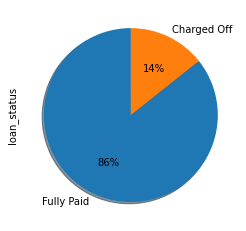

In [27]:
#Plotting Pie chart to see % of Charged Off and Fully Paid users
lending_df.loan_status.value_counts().plot.pie(autopct=lambda x: '{:.0f}%'.format(x),shadow=True, startangle=90)
plt.show()

__Observation :__ Majority of users have paid off which is a good sign and 14% are defaulters

##### Term column

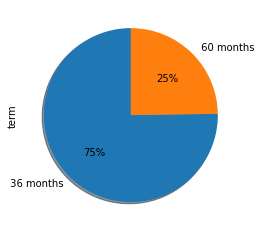

In [28]:
#Plotting Pie chart to see % of users under which Term they land most
lending_df.term.value_counts().plot.pie(autopct=lambda x: '{:.0f}%'.format(x),shadow=True, startangle=90)
plt.show()

__Observation :__ Only 25% of users are having 60 Months Loan Period

##### home_ownership column

In [29]:
#Home Ownership has one none we can safely move it to others 
lending_df.home_ownership.value_counts()

RENT        17881
MORTGAGE    16370
OWN          2683
OTHER          98
NONE            1
Name: home_ownership, dtype: int64

__Observation :__ Looks like there is one user which has Home Ownership as None and its safe to assume them as one of the Other catagory

In [30]:
#Updating the one record containing None to Other
lending_df['home_ownership'] = lending_df['home_ownership'].replace(['NONE'],'OTHER')
lending_df.home_ownership.value_counts()

RENT        17881
MORTGAGE    16370
OWN          2683
OTHER          99
Name: home_ownership, dtype: int64

##### addr_state Column

In [31]:
#Lets check if all the states provided are valid 
lending_unique_state = []
lending_unique_state = lending_df.addr_state.unique()
print(lending_unique_state)

['AZ' 'GA' 'CA' 'NC' 'TX' 'VA' 'IL' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA' 'MN'
 'NJ' 'OR' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'NV' 'AK' 'CO'
 'MD' 'WV' 'VT' 'MI' 'DC' 'NH' 'AR' 'NM' 'KS' 'HI' 'OK' 'MT' 'WY' 'SD'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']


In [32]:
#Loading Master List for all US states
master_states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [33]:
for i in lending_unique_state:
 if (i not in master_states ):
  print(i)

__Observation :__ All are valid states as there are no invalid states retuned

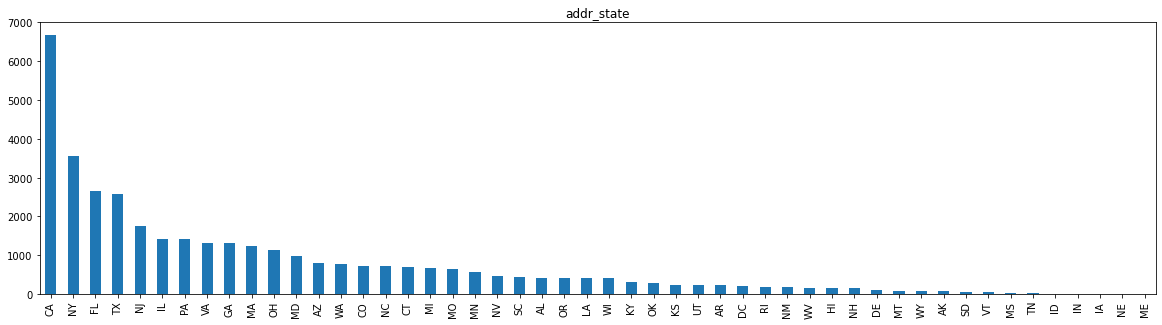

In [34]:
#Plotting Bar chart to see the loan distribution across States
plt.figure(figsize=(20,5))
lending_df.addr_state.value_counts().plot.bar()
plt.title('addr_state')
plt.show()

__Observation__ : CA , NY , FL and TX being the highest user counts which is true since these are the top 4 states in US having high population

##### Grade Column

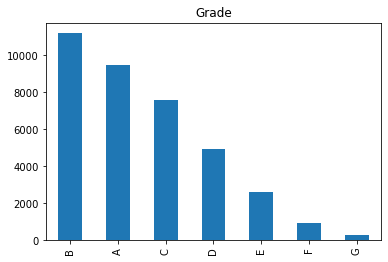

In [35]:
#Plotting Bar chart to check the loan distribution according to Grades 
lending_df.grade.value_counts().plot.bar()
plt.title('Grade')
plt.show()

__Observation :__ Grade A and B has received the most of the loan

##### emp_length Column

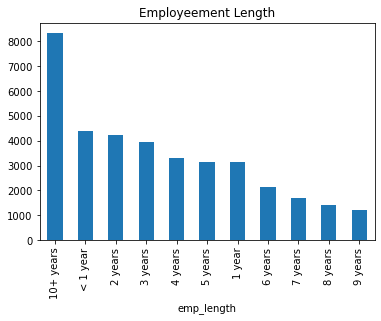

In [36]:
#Plotting Bar chart to see the loan distribution across Employeement Lenght 
lending_df.emp_length.value_counts().plot.bar()
plt.xlabel('emp_length')
plt.title('Employeement Length')
plt.show()

__Observation :__ 10plus year Employee length loan has been distributed the most

##### year and month columns

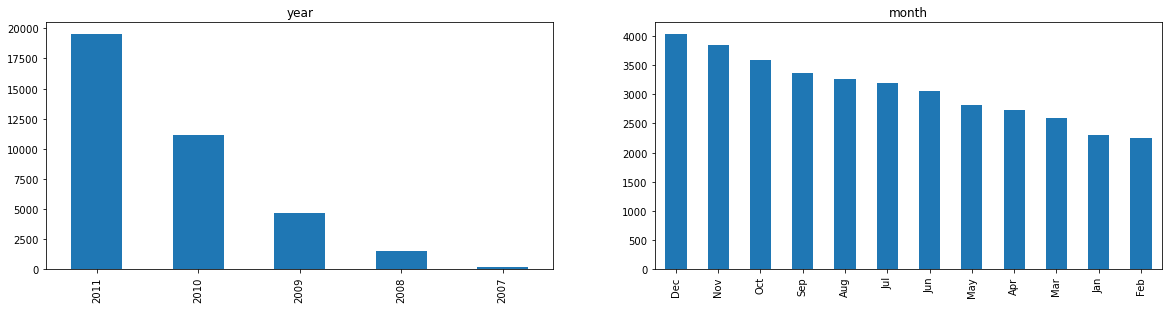

In [37]:
#Plotting Bar chart to see the loan distribution across Year and Month
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
lending_df.issue_d_year.value_counts().plot.bar()
plt.title("year")

plt.subplot(2,2,2)
lending_df.issue_d_month.value_counts().plot.bar()
plt.title("month")

plt.show()

__Observation :__ <br>2011 most of the loans were being distributed as the Global and US econmy was blooming <br> Dec,Nov Most of the loans have been distributed as its holidy season and users require money

##### Verification Status Column

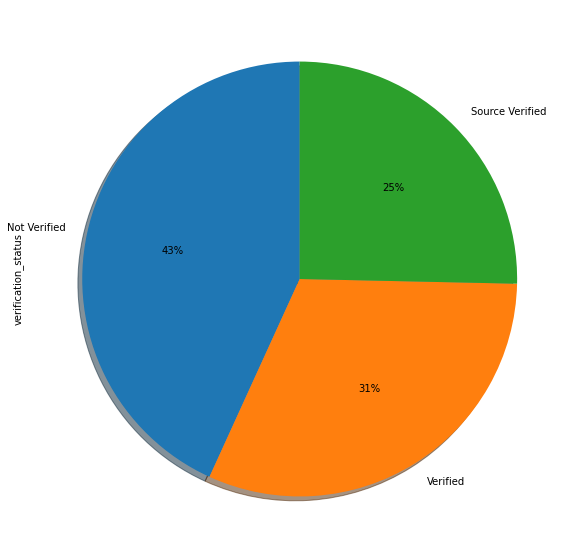

In [38]:
#Plotting Pie Chart to see the % of Verification Status
plt.figure(figsize=(10,10))
lending_df.verification_status.value_counts().plot.pie(autopct=lambda x: '{:.0f}%'.format(x),shadow=True, startangle=90)
plt.show()

__Observation :__ 43 % of users are Non Verified

##### Home Ownership Column

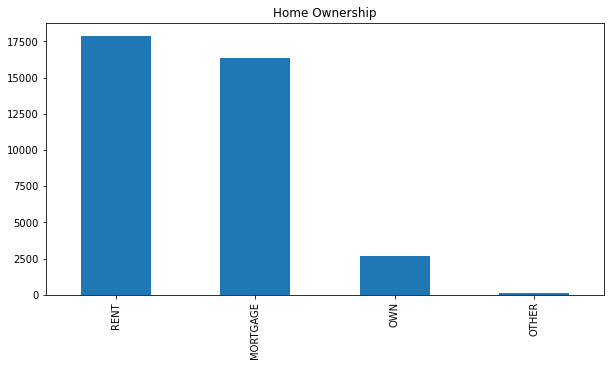

In [39]:
#Plotting Bar chart to see the loan distribution across Home Ownership
plt.figure(figsize=(10,5))
lending_df.home_ownership.value_counts().plot.bar()
plt.title('Home Ownership')
plt.show()

__Observation__ : Majority of users are either Staying in Rented property or Mortgage

###### purpose column

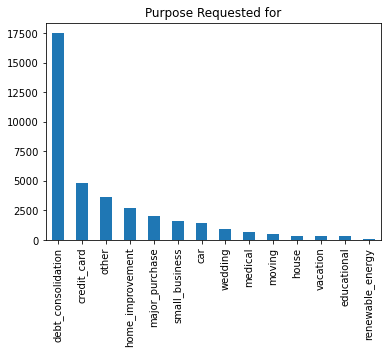

In [40]:
#Plotting Bar chart to see the loan distribution across Purpose Requested for
lending_df.purpose.value_counts().plot.bar()
plt.title('Purpose Requested for')
plt.show()

__Observation__ : Majority of Loan distributed to users request for purpose of Debt Consolidation

##### pub_rec_bankruptcies Column

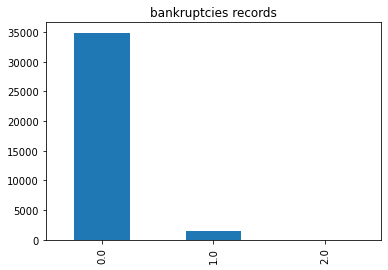

In [41]:
#Plotting Bar chart to see the loan distribution across user bankruptcies records
lending_df.pub_rec_bankruptcies.value_counts().plot.bar()
plt.title('bankruptcies records')
plt.show()

__Observation__ : Company has taken proper care by considering Public bankruptcies records as majority of loan has been provided to users with no bankruptcies records

In [42]:
#Running describe to see other key variables with dataype as Int and Float
lending_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year
count,3.703300e+04,37033.000000,37033.000000,37033.000000,37033.000000,37033.000000,3.703300e+04,37033.000000,37033.000000,37033.000000,37033.000000,37033.000000,37033.000000,37003.000000,37033.000000,37033.0,37033.0,37033.000000,37033.000000,37033.000000,37033.000000,37033.000000,37033.000000,37033.000000,37033.000000,36424.000000,37033.000000
mean,6.749171e+05,11126.969865,10859.993789,10294.250013,11.967538,324.706787,6.922405e+04,13.315205,0.146977,0.872681,9.309157,0.054114,13368.416790,48.954995,22.106527,0.0,0.0,11973.566786,11371.642816,9730.911329,2142.971895,1.379409,98.304241,12.713752,2768.927805,0.041895,2010.303324
std,2.084949e+05,7340.613213,7083.357307,7015.523264,3.682372,208.364623,6.468910e+04,6.652433,0.493723,1.071145,4.395352,0.235600,15835.463541,28.295704,11.405222,0.0,0.0,8810.522553,8700.185466,7004.212720,2394.998070,7.376366,705.518867,151.182738,4492.915886,0.201037,0.878590
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
25%,5.098140e+05,5500.000000,5400.000000,5000.000000,9.010000,167.730000,4.100000e+04,8.200000,0.000000,0.000000,6.000000,0.000000,3730.000000,25.550000,14.000000,0.0,0.0,5578.238565,5113.890000,4600.000000,659.860000,0.000000,0.000000,0.000000,222.430000,0.000000,2010.000000
50%,6.533060e+05,10000.000000,9600.000000,8899.241412,11.830000,280.620000,6.000000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8865.000000,49.400000,20.000000,0.0,0.0,9813.642278,9201.420000,8000.000000,1327.880000,0.000000,0.000000,0.000000,583.920000,0.000000,2011.000000
75%,8.265640e+05,15000.000000,15000.000000,14075.000000,14.420000,428.700000,8.257000e+04,18.570000,0.000000,1.000000,12.000000,0.000000,17028.000000,72.500000,29.000000,0.0,0.0,16260.266720,15454.710000,13317.570000,2708.070000,0.000000,0.000000,0.000000,3514.640000,0.000000,2011.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,2011.000000


#### Loan Amount and Interest Rate Columns

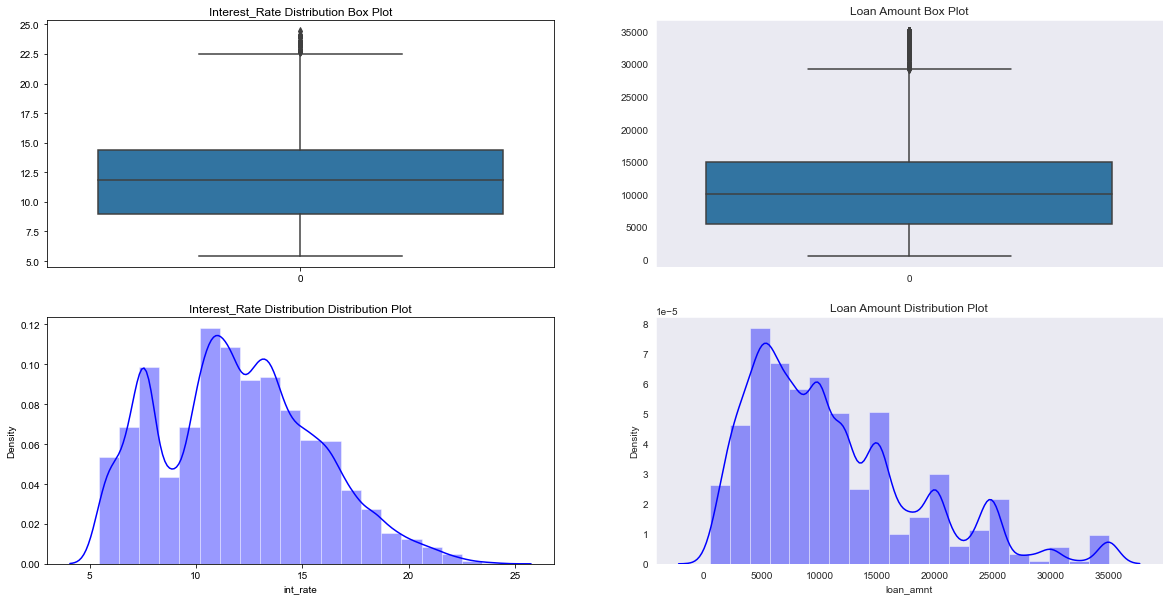

In [43]:
#Plotting Box and Distribution plot in regards to Loan Amount and Intrest Rate
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=lending_df.int_rate)
plt.title("Interest_Rate Distribution Box Plot" , fontsize=12)

plt.subplot(2,2,3)
sns.set_style("dark")
sns.distplot(lending_df.int_rate,bins=20,color="b")
plt.title("Interest_Rate Distribution Distribution Plot" , fontsize=12)


plt.subplot(2,2,2)
sns.boxplot(data=lending_df.loan_amnt)
plt.title("Loan Amount Box Plot" , fontsize=12)

plt.subplot(2,2,4)
sns.set_style("dark")
sns.distplot(lending_df.loan_amnt,bins=20,color="b")
plt.title("Loan Amount Distribution Plot" , fontsize=12)

plt.show()

__Observation__ :<br>
Majority of users are having interrest Rate between 9%-15% and very few have High Intreset Rate<br>
Majority of users have loan amount between 5,000 - 1,500 and few above 30,000

In [44]:
#Create Bins for Intreset Rate 
int_rate_bins = create_bins_val(round(lending_df.int_rate.min()),round(lending_df.int_rate.max()),5)
print(int_rate_bins[0])


[5, 9, 13, 17, 21, 25]


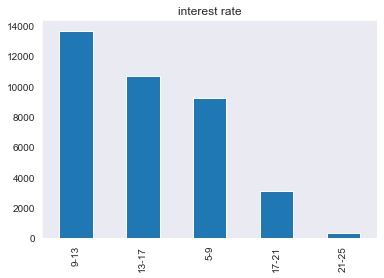

In [45]:
lending_df['int_rate_bin'] = pd.cut(lending_df['int_rate'],int_rate_bins[0],labels=int_rate_bins[1][:-1])
lending_df['int_rate_bin'].value_counts().plot.bar()
plt.title('interest rate')
plt.show()

__Observation__ : Majority of users are having interrest Rate between 9%-13% and very few have High Intreset Rate

In [46]:
#Create Bins for Intreset Rate 
loan_amount_bins = create_bins_val(round(lending_df.loan_amnt.min()),round(lending_df.loan_amnt.max()),10)
print(loan_amount_bins[0])

[500, 3950, 7400, 10850, 14300, 17750, 21200, 24650, 28100, 31550, 35000]


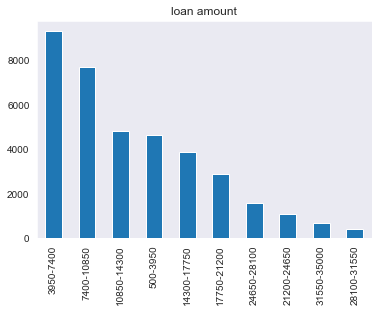

In [47]:
lending_df['loan_amnt_bin'] = pd.cut(lending_df['loan_amnt'],loan_amount_bins[0],labels=loan_amount_bins[1][:-1])
lending_df['loan_amnt_bin'].value_counts().plot.bar()
plt.title('loan amount')
plt.show()

__Observation__ : Majority of users are having Loan Amount between 3050-7400.

##### Annual Income column

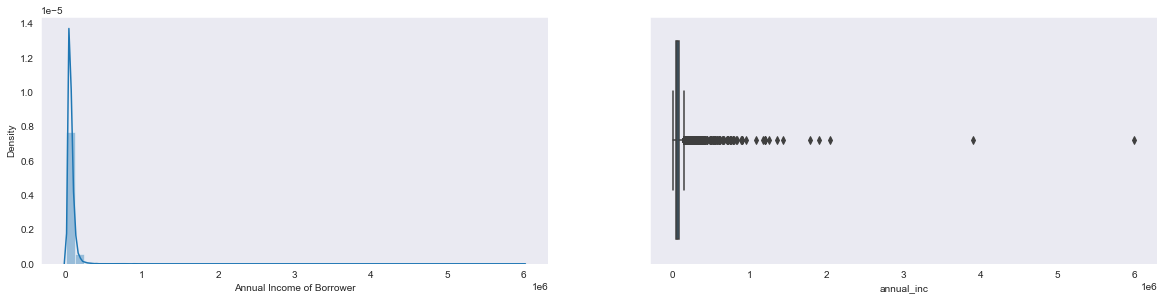

In [48]:
#Plotting distribution graphs in regards to Annual Income
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(lending_df['annual_inc'], axlabel = 'Annual Income of Borrower')
plt.subplot(2,2,2)
sns.boxplot(lending_df['annual_inc'])
plt.show()

__Observation__ : Lot of users are within 150000. During Segmented analysis we can remove the outiners and analyse the data

##### Open Account & Total Account Columns

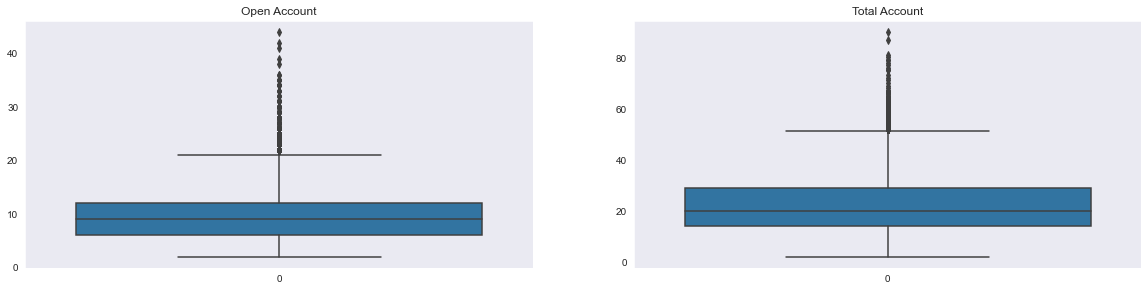

In [49]:
#Box plot for Open Account & Total Account
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=lending_df.open_acc)
plt.title('Open Account')

plt.subplot(2,2,2)
sns.boxplot(data=lending_df.total_acc)
plt.title('Total Account')
plt.show()

__Observation__ : Nothing much to observe over here

##### dti Column

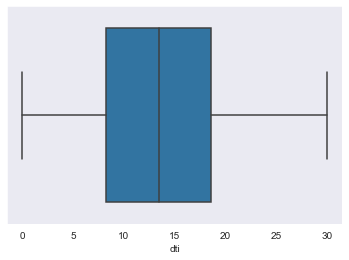

In [50]:
#Box plot for DTI
sns.boxplot(lending_df['dti'])
plt.show()

__Observation__ : Nothing much to observe over here

In [51]:
#Creating Bin for DTI
dti_bins = create_bins_val(round(lending_df.dti.min()),round(lending_df.dti.max()),5)
print(dti_bins[0])

[0, 6, 12, 18, 24, 30]


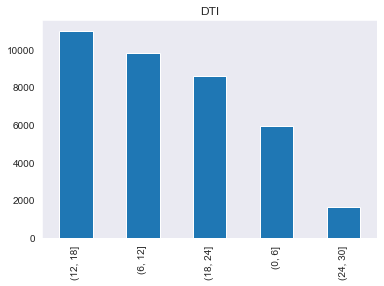

In [52]:
lending_df['dti_bin'] = pd.cut(lending_df['dti'],dti_bins[0],dti_bins[1][:-1])
lending_df['dti_bin'].value_counts().plot.bar()
plt.title("DTI")
plt.show()

__Observation__ : Most of the users are having DTI between 12-18

### 4. Bivariate Analysis

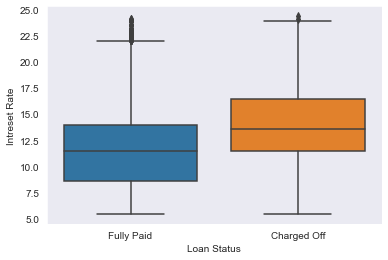

In [53]:
#Comparing Intreset Rate with Loan Status
sns.boxplot(y='int_rate', x='loan_status', data=lending_df)
plt.ylabel('Intreset Rate')
plt.xlabel('Loan Status')
plt.show()

__Observation__ : 25th percentile of Charged Off Intreset Rate is higer than 50th percentile of Fully Paid. It is one of the driving factor of Charged Off

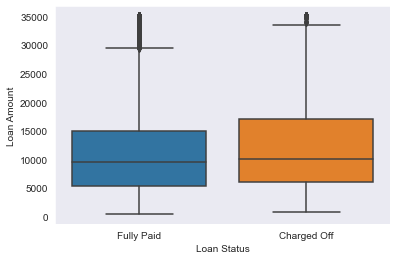

In [54]:
#Comparing Loan Amount with Loan Status
sns.boxplot(y='loan_amnt', x='loan_status', data=lending_df)
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.show()

__Observation__ : 75th percentile of Charged Off Loan Amount is higer than 75th percentile of Fully Paid .

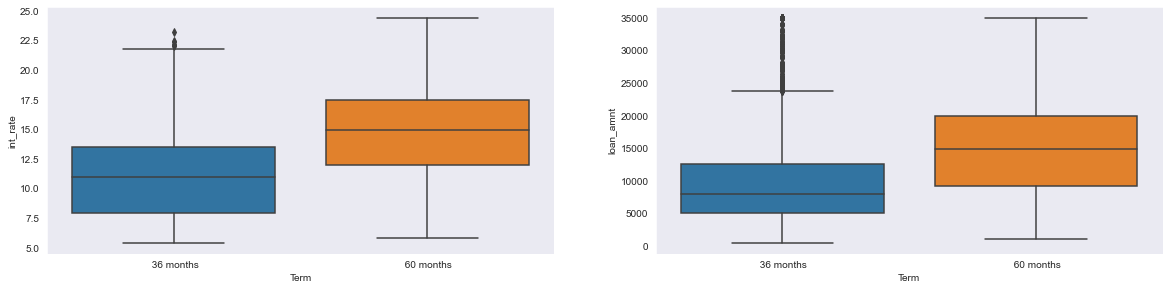

In [55]:
#Comparing Loan Amount , Interest Rate with Loan Term
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(y='int_rate', x='term', data=lending_df)
plt.ylabel('int_rate')
plt.xlabel('Term')

plt.subplot(2,2,2)
sns.boxplot(y='loan_amnt', x='term', data=lending_df)
plt.ylabel('loan_amnt')
plt.xlabel('Term')
plt.show()

__Observation__ : As expected 60 Months term are for mostly for High Loan Amount and also with High Interest Rate

loan_status  charged_off_perc  fully_paid_perc
term                                          
 36 months              10.78            89.22
 60 months              24.97            75.03


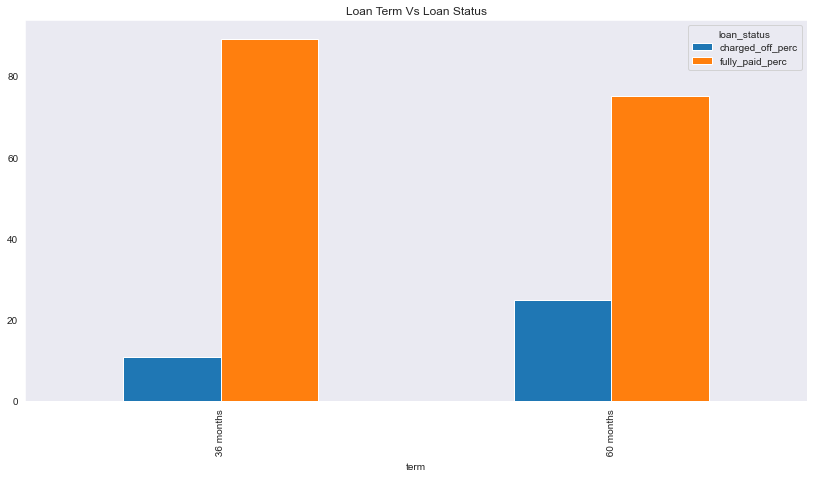

In [56]:
#Since both Term and Loan Status are Catagorical we need to identify the % using Cross Tabulation 
lending_status_term_crosstab = pd.crosstab(lending_df['term'], lending_df['loan_status'])
lending_status_term_crosstab['sum_of_loan_status'] = lending_status_term_crosstab['Charged Off'] + lending_status_term_crosstab['Fully Paid']
lending_status_term_crosstab['charged_off_perc'] = round((lending_status_term_crosstab['Charged Off']/lending_status_term_crosstab.sum_of_loan_status)*100, 2)
lending_status_term_crosstab['fully_paid_perc'] = round((lending_status_term_crosstab['Fully Paid']/lending_status_term_crosstab.sum_of_loan_status)*100, 2)
lending_status_term_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_term_crosstab)
lending_status_term_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='Loan Term Vs Loan Status')
plt.show()

__Observation__ : Even though Majority of Loan Term is 36 months , but the Charged off users are mainly from 60 months Loan Term . Which can be a driving factor as the Loan amount is huge which leads to High Interest Rate

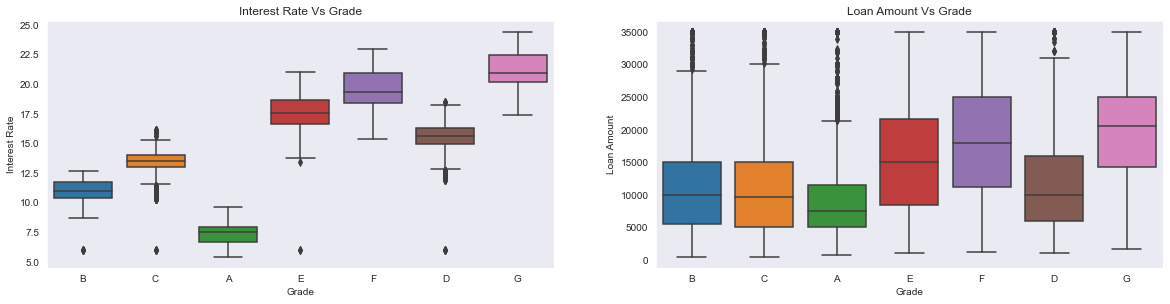

In [57]:
#Comparing Loan Amount , Interest Rate with Loan Term
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(y='int_rate', x='grade', data=lending_df )
plt.ylabel('Interest Rate')
plt.xlabel('Grade')
plt.title("Interest Rate Vs Grade" , fontsize=12)

plt.subplot(2,2,2)
sns.boxplot(y='loan_amnt', x='grade', data=lending_df )
plt.ylabel('Loan Amount')
plt.xlabel('Grade')
plt.title("Loan Amount Vs Grade" , fontsize=12)

plt.show()

__Observation__ : Looks like Grade D - G have High Interest Rate and there is hugh variation in loan amount for Grade D - G

loan_status  Charged Off  Fully Paid
grade                               
A                    547        8961
B                   1337        9882
C                   1260        6304
D                   1062        3856
E                    683        1903
F                    308         638
G                     97         195
loan_status  charged_off_perc  fully_paid_perc
grade                                         
A                        5.75            94.25
B                       11.92            88.08
C                       16.66            83.34
D                       21.59            78.41
E                       26.41            73.59
F                       32.56            67.44
G                       33.22            66.78


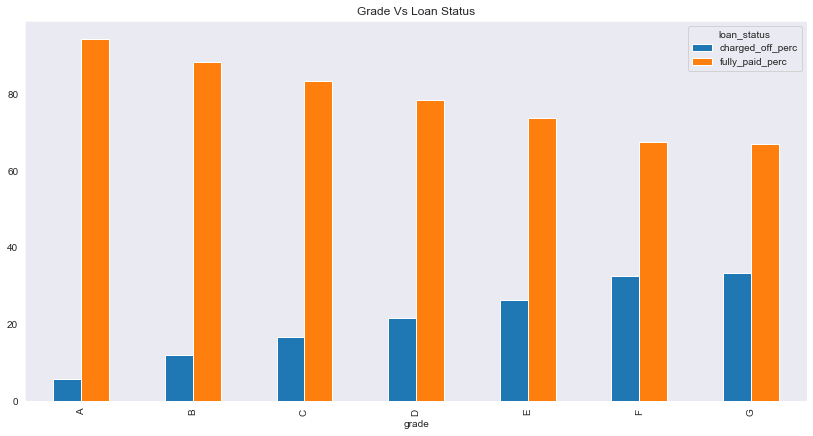

In [58]:
#Since both Grade and Loan Status are Catagorical we need to identify the % using Cross Tabulation 
lending_status_grade_crosstab = pd.crosstab(lending_df['grade'], lending_df['loan_status'])
print(lending_status_grade_crosstab)
lending_status_grade_crosstab['sum_of_loan_status'] = lending_status_grade_crosstab['Charged Off'] + lending_status_grade_crosstab['Fully Paid']
lending_status_grade_crosstab['charged_off_perc'] = round((lending_status_grade_crosstab['Charged Off']/lending_status_grade_crosstab.sum_of_loan_status)*100, 2)
lending_status_grade_crosstab['fully_paid_perc'] = round((lending_status_grade_crosstab['Fully Paid']/lending_status_grade_crosstab.sum_of_loan_status)*100, 2)
lending_status_grade_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_grade_crosstab)
lending_status_grade_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='Grade Vs Loan Status')
plt.show()

__Observation__ : Looks like Grade D to G have more Charged Off users due to high Interest Rate and Loan Amount<br>
Lower grade loans results in higher charge offs.<br>
We can see as grades gets lower, charge off rate increases proportionately

term           36 months   60 months
issue_d_year                        
2007                 181           0
2008                1543           0
2009                4665           0
2010                8134        2983
2011               13338        6189
term          36_Months_perc  60_Months_perc
issue_d_year                                
2007                  100.00            0.00
2008                  100.00            0.00
2009                  100.00            0.00
2010                   73.17           26.83
2011                   68.31           31.69


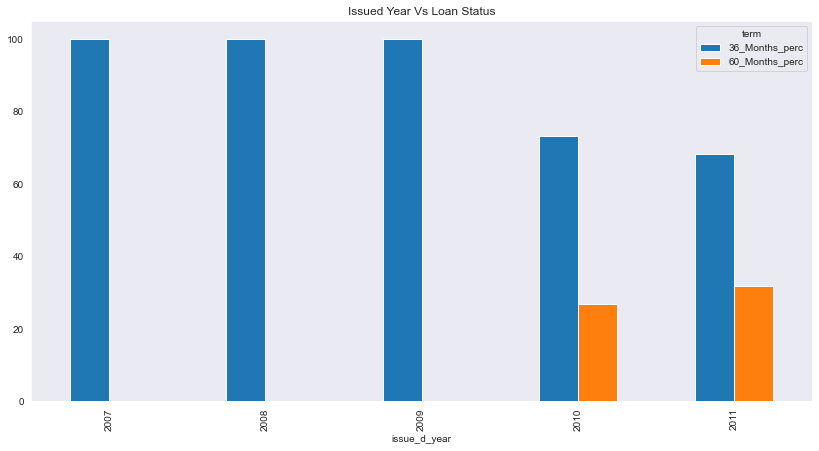

In [59]:
#Since both Term and Year are Catagorical we need to identify the % using Cross Tabulation 
lending_term_yr_crosstab = pd.crosstab(lending_df['issue_d_year'], lending_df['term'])
print(lending_term_yr_crosstab)
lending_term_yr_crosstab['sum_of_terms'] = lending_term_yr_crosstab[' 36 months'] + lending_term_yr_crosstab[' 60 months']
lending_term_yr_crosstab['36_Months_perc'] = round((lending_term_yr_crosstab[' 36 months']/lending_term_yr_crosstab.sum_of_terms)*100, 2)
lending_term_yr_crosstab['60_Months_perc'] = round((lending_term_yr_crosstab[' 60 months']/lending_term_yr_crosstab.sum_of_terms)*100, 2)
lending_term_yr_crosstab.drop(columns=[' 36 months', ' 60 months','sum_of_terms'], inplace=True)
print(lending_term_yr_crosstab)
lending_term_yr_crosstab.plot.bar(stacked=False, figsize=(14,7),  title='Issued Year Vs Loan Status')
plt.show()

__Observation__ : 60 Month term was introduced on 2010 onwards.

loan_status   Charged Off  Fully Paid
issue_d_year                         
2007                   36         145
2008                  243        1300
2009                  588        4077
2010                 1383        9734
2011                 3044       16483
loan_status   charged_off_perc  fully_paid_perc
issue_d_year                                   
2007                     19.89            80.11
2008                     15.75            84.25
2009                     12.60            87.40
2010                     12.44            87.56
2011                     15.59            84.41


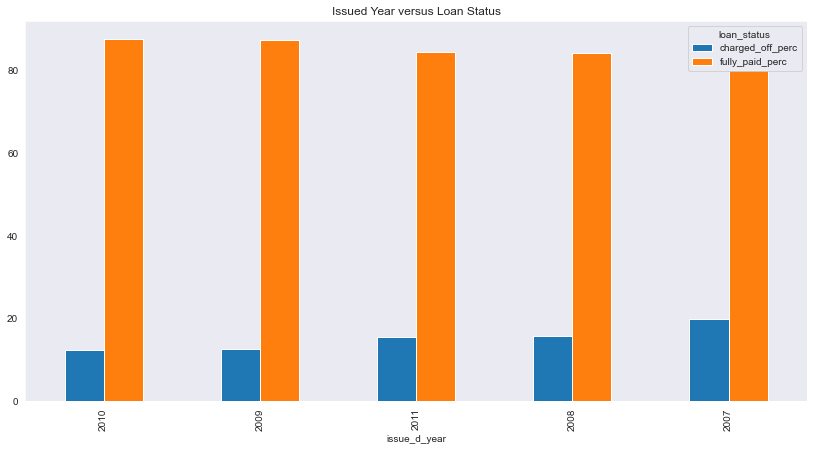

In [60]:
#Since both Loan Status and Year are Catagorical we need to identify the % using Cross Tabulation 
lending_status_yr_crosstab = pd.crosstab(lending_df['issue_d_year'], lending_df['loan_status'])
print(lending_status_yr_crosstab)
lending_status_yr_crosstab['sum_of_loan_status'] = lending_status_yr_crosstab['Charged Off'] + lending_status_yr_crosstab['Fully Paid']
lending_status_yr_crosstab['charged_off_perc'] = round((lending_status_yr_crosstab['Charged Off']/lending_status_yr_crosstab.sum_of_loan_status)*100, 2)
lending_status_yr_crosstab['fully_paid_perc'] = round((lending_status_yr_crosstab['Fully Paid']/lending_status_yr_crosstab.sum_of_loan_status)*100, 2)
lending_status_yr_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_yr_crosstab)
lending_status_yr_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='Issued Year versus Loan Status')
plt.show()

__Observation__ : 2007 has more percentage of defaulters and one of the reason be due to recession

In [61]:
#Indentifying the states with Lowest Loan Distributed and removing them for below calculation
lending_df.addr_state.value_counts().sort_values().head(10)

ME     2
NE     3
IA     5
IN     6
ID     6
TN    16
MS    19
VT    52
SD    59
AK    75
Name: addr_state, dtype: int64

loan_status  charged_off_perc  fully_paid_perc
addr_state                                    
NV                      21.83            78.17
AK                      20.00            80.00
FL                      17.63            82.37
HI                      17.28            82.72
SD                      16.95            83.05
NM                      16.28            83.72
MO                      16.22            83.78
OR                      16.11            83.89
GA                      15.87            84.13
CA                      15.80            84.20
NJ                      15.65            84.35
UT                      15.64            84.36
WA                      15.23            84.77
MD                      15.08            84.92
KY                      14.95            85.05
NC                      14.85            85.15
MI                      14.54            85.46
SC                      14.32            85.68
NH                      14.29            85.71
OK           

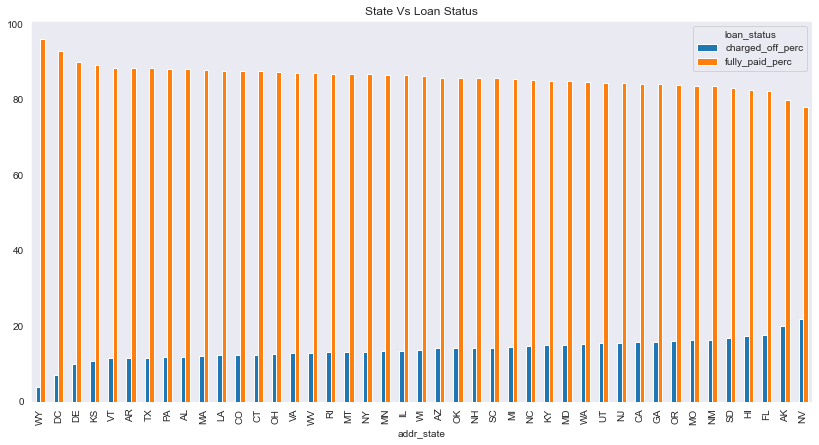

In [62]:
#Since both Addres State and Loan are Catagorical we need to identify the % using Cross Tabulation 
lending_status_addrstate_crosstab = pd.crosstab(lending_df['addr_state'][~lending_df['addr_state'].isin(['NE','ME','IA','IN','ID','TN','MS'])], lending_df['loan_status'])
#print(lending_status_addrstate_crosstab.sort_values(by='Charged Off' , ascending = False))

lending_status_addrstate_crosstab['sum_of_loan_status'] = lending_status_addrstate_crosstab['Charged Off'] + lending_status_addrstate_crosstab['Fully Paid']
### calculating percentages grade-wise
lending_status_addrstate_crosstab['charged_off_perc'] = round((lending_status_addrstate_crosstab['Charged Off']/lending_status_addrstate_crosstab.sum_of_loan_status)*100, 2)
lending_status_addrstate_crosstab['fully_paid_perc'] = round((lending_status_addrstate_crosstab['Fully Paid']/lending_status_addrstate_crosstab.sum_of_loan_status)*100, 2)
lending_status_addrstate_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_addrstate_crosstab.sort_values(by='charged_off_perc' , ascending = False))
lending_status_addrstate_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='State Vs Loan Status')
plt.show()

__Observation__ : NV, AK states having hihg Charged Off percentage

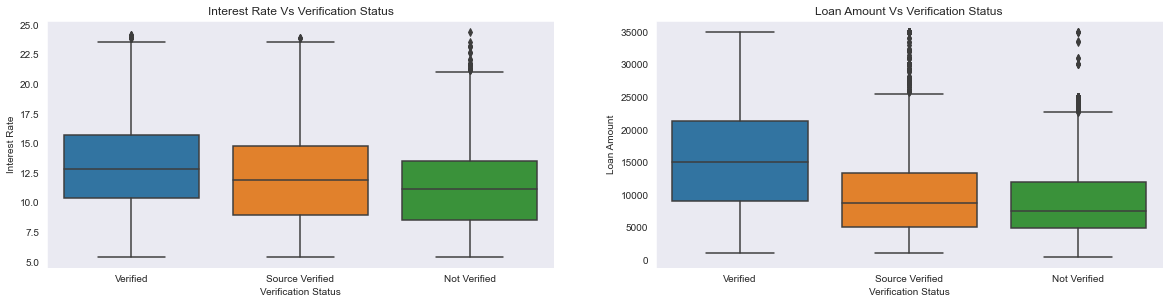

In [63]:
#Comparing Loan Amount , Interest Rate with Verification Status
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(y='int_rate', x='verification_status', data=lending_df )
plt.ylabel('Interest Rate')
plt.xlabel('Verification Status')
plt.title("Interest Rate Vs Verification Status" , fontsize=12)

plt.subplot(2,2,2)
sns.boxplot(y='loan_amnt', x='verification_status', data=lending_df )
plt.ylabel('Loan Amount')
plt.xlabel('Verification Status')
plt.title("Loan Amount Vs Verification Status" , fontsize=12)

plt.show()

__Observation__ : Company is doing good in leanding less loan amount to Not Verified users , but there is high Loan amount providoined to Not Verififed users which is High Risk

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                1999       13996
Source Verified             1372        8014
Verified                    1923        9729
loan_status          charged_off_perc  fully_paid_perc
verification_status                                   
Not Verified                    12.50            87.50
Source Verified                 14.62            85.38
Verified                        16.50            83.50


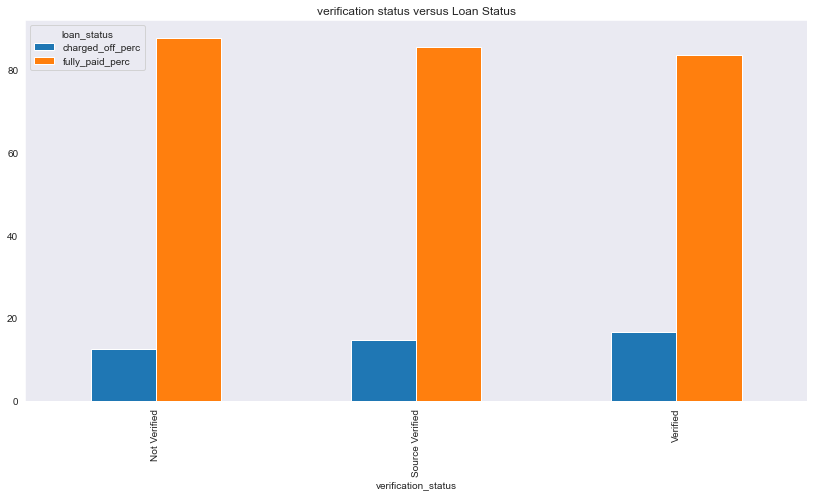

In [64]:
#Since both Verification Status and Loan are Catagorical we need to identify the % using Cross Tabulation 
lending_status_verification_crosstab = pd.crosstab(lending_df['verification_status'], lending_df['loan_status'])
print(lending_status_verification_crosstab)
lending_status_verification_crosstab['sum_of_loan_status'] = lending_status_verification_crosstab['Charged Off'] + lending_status_verification_crosstab['Fully Paid']
lending_status_verification_crosstab['charged_off_perc'] = round((lending_status_verification_crosstab['Charged Off']/lending_status_verification_crosstab.sum_of_loan_status)*100, 2)
lending_status_verification_crosstab['fully_paid_perc'] = round((lending_status_verification_crosstab['Fully Paid']/lending_status_verification_crosstab.sum_of_loan_status)*100, 2)
lending_status_verification_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_verification_crosstab)
lending_status_verification_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='verification status versus Loan Status')
plt.show()

__Observation__ : No much difference in regards Verification Status Vs Loan Status percentage

loan_status         Charged Off  Fully Paid
purpose                                    
car                         154        1283
credit_card                 503        4331
debt_consolidation         2639       14862
educational                  52         257
home_improvement            320        2405
house                        56         288
major_purchase              205        1846
medical                     100         550
moving                       85         460
other                       589        3090
renewable_energy             17          76
small_business              435        1184
vacation                     50         292
wedding                      89         815
loan_status         charged_off_perc  fully_paid_perc
purpose                                              
car                            10.72            89.28
credit_card                    10.41            89.59
debt_consolidation             15.08            84.92
educational               

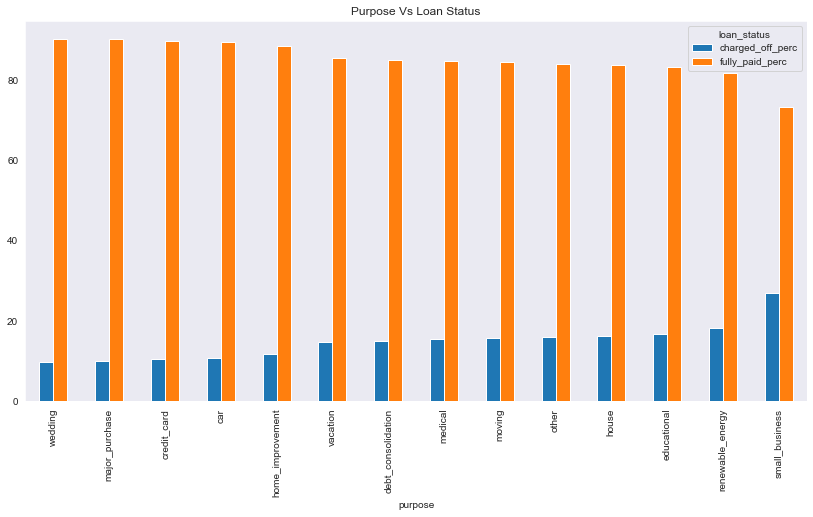

In [65]:
#Since both Purpose and Loan are Catagorical we need to identify the % using Cross Tabulation 
lending_status_purpose_crosstab = pd.crosstab(lending_df['purpose'], lending_df['loan_status'])
print(lending_status_purpose_crosstab)
lending_status_purpose_crosstab['sum_of_loan_status'] = lending_status_purpose_crosstab['Charged Off'] + lending_status_purpose_crosstab['Fully Paid']
lending_status_purpose_crosstab['charged_off_perc'] = round((lending_status_purpose_crosstab['Charged Off']/lending_status_purpose_crosstab.sum_of_loan_status)*100, 2)
lending_status_purpose_crosstab['fully_paid_perc'] = round((lending_status_purpose_crosstab['Fully Paid']/lending_status_purpose_crosstab.sum_of_loan_status)*100, 2)
lending_status_purpose_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_purpose_crosstab)
lending_status_purpose_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='Purpose Vs Loan Status')
plt.show()

__Observation__ : Small Business Loans are having High Charged Off percentage

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE               2201       14169
OTHER                    18          81
OWN                     388        2295
RENT                   2687       15194
loan_status     charged_off_perc  fully_paid_perc
home_ownership                                   
MORTGAGE                   13.45            86.55
OTHER                      18.18            81.82
OWN                        14.46            85.54
RENT                       15.03            84.97


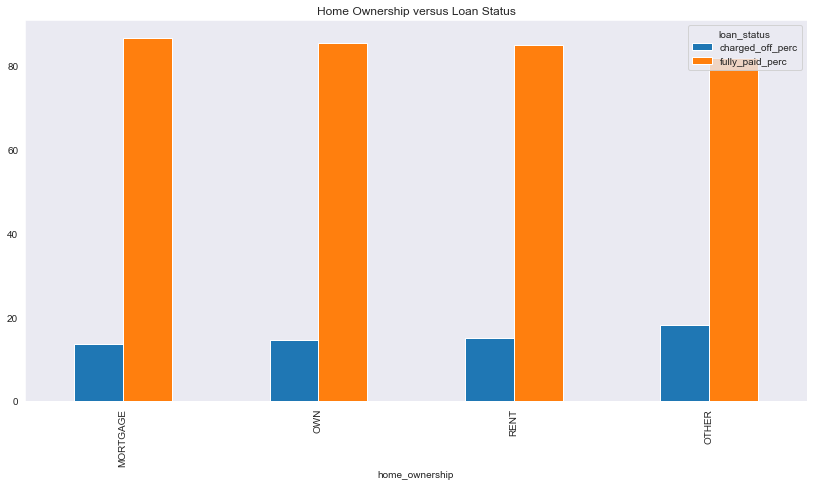

In [66]:
#Since both Home Ownership and Loan are Catagorical we need to identify the % using Cross Tabulation 
lending_status_homeown_crosstab = pd.crosstab(lending_df['home_ownership'], lending_df['loan_status'])
print(lending_status_homeown_crosstab)
lending_status_homeown_crosstab['sum_of_loan_status'] = lending_status_homeown_crosstab['Charged Off'] + lending_status_homeown_crosstab['Fully Paid']
lending_status_homeown_crosstab['charged_off_perc'] = round((lending_status_homeown_crosstab['Charged Off']/lending_status_homeown_crosstab.sum_of_loan_status)*100, 2)
lending_status_homeown_crosstab['fully_paid_perc'] = round((lending_status_homeown_crosstab['Fully Paid']/lending_status_homeown_crosstab.sum_of_loan_status)*100, 2)
lending_status_homeown_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_homeown_crosstab)
lending_status_homeown_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='Home Ownership versus Loan Status')
plt.show()

__Observation__ : No much percentage difference in regards to Home Ownership Vs Loan Status

loan_status  charged_off_perc  fully_paid_perc
emp_length                                    
1 year                  14.37            85.63
10+ years               15.64            84.36
2 years                 13.18            86.82
3 years                 13.75            86.25
4 years                 13.70            86.30
5 years                 14.17            85.83
6 years                 14.15            85.85
7 years                 15.28            84.72
8 years                 13.98            86.02
9 years                 12.81            87.19
< 1 year                13.94            86.06


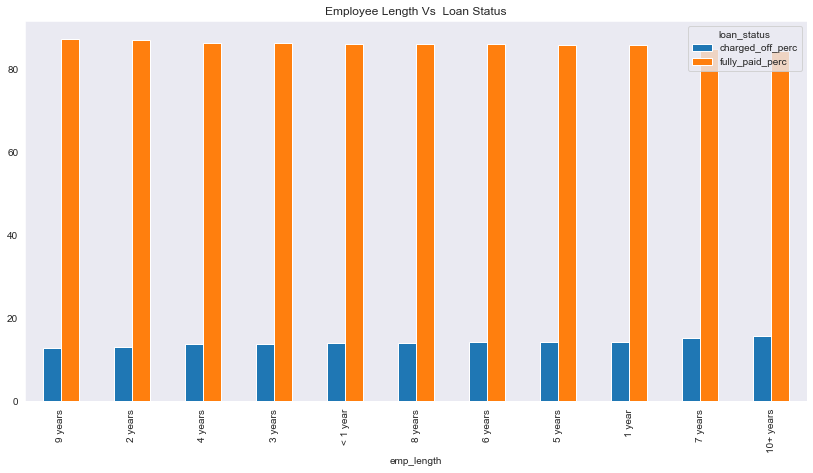

In [67]:
#Since both Employment Lenght and Loan are Catagorical we need to identify the % using Cross Tabulation 
lending_status_homeown_crosstab = pd.crosstab(lending_df['emp_length'], lending_df['loan_status'])
lending_status_homeown_crosstab['sum_of_loan_status'] = lending_status_homeown_crosstab['Charged Off'] + lending_status_homeown_crosstab['Fully Paid']
lending_status_homeown_crosstab['charged_off_perc'] = round((lending_status_homeown_crosstab['Charged Off']/lending_status_homeown_crosstab.sum_of_loan_status)*100, 2)
lending_status_homeown_crosstab['fully_paid_perc'] = round((lending_status_homeown_crosstab['Fully Paid']/lending_status_homeown_crosstab.sum_of_loan_status)*100, 2)
lending_status_homeown_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_homeown_crosstab)
lending_status_homeown_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='Employee Length Vs  Loan Status')
plt.show()

__Observation__ : No much percentage difference in regards to Employee Lenght Vs Loan Status

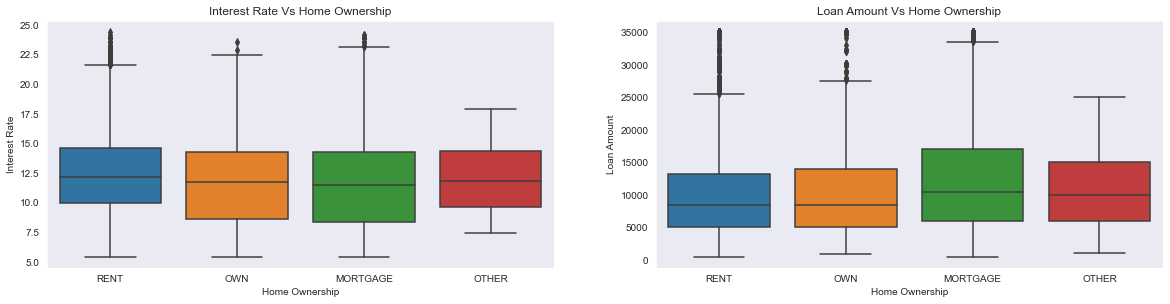

In [68]:
#Box plot in regards to Interest Rate , Loan Amount Vs Home Ownership
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(y='int_rate', x='home_ownership', data=lending_df )
plt.ylabel('Interest Rate')
plt.xlabel('Home Ownership')
plt.title("Interest Rate Vs Home Ownership" , fontsize=12)

plt.subplot(2,2,2)
sns.boxplot(y='loan_amnt', x='home_ownership', data=lending_df )
plt.ylabel('Loan Amount')
plt.xlabel('Home Ownership')
plt.title("Loan Amount Vs Home Ownership" , fontsize=12)


plt.show()

__Observation__ :<br>
Generally, we see higher loan amount – high interest rate , but regarding Mortgage Owners the Interest rate drops , it can be considering the Mortgage.<br>
Also 75th percentile of Mortgage loan amount is high

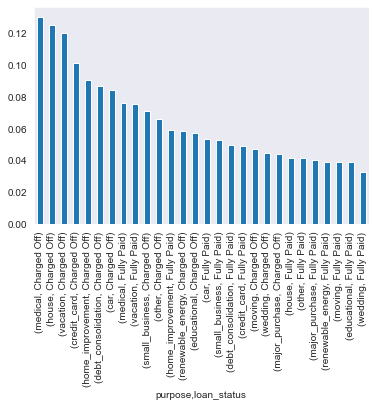

In [69]:
#Grouping Purpose and Loan status with Derogatory public records 
lending_df.groupby(['purpose','loan_status'])['pub_rec'].mean().sort_values(ascending=False).plot.bar()
plt.show()

__Observation__ :<br>
Company has provided loans to Vacation and House purpose for users having high average for Public Record .<br>


As Medical Loans are urgent and required for emergency purpose, company should try to provide low loan rates so users can return it .

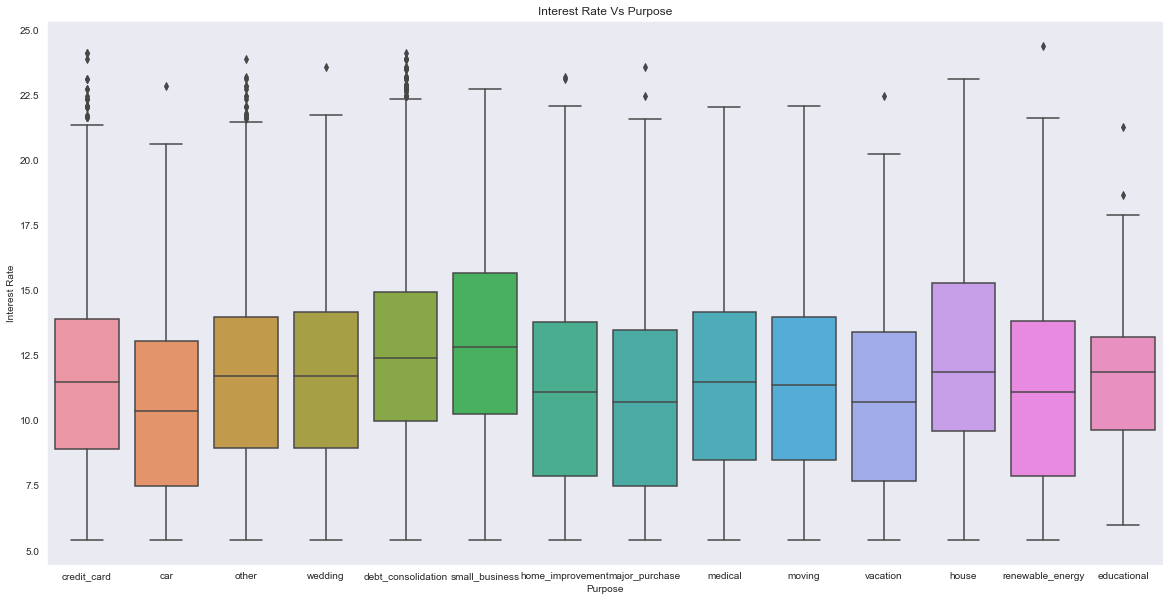

In [70]:
#Box Plot Interest Rate and Loan Amount
plt.figure(figsize=(20,10))
sns.boxplot(y='int_rate', x='purpose', data=lending_df )
plt.ylabel('Interest Rate')
plt.xlabel('Purpose')
plt.title("Interest Rate Vs Purpose" , fontsize=12)
plt.show()

__Observation__ : As intreset Raet is high for Small Business which is matching with High Charged Off percentage as it resulted few rows above

<Figure size 432x288 with 0 Axes>

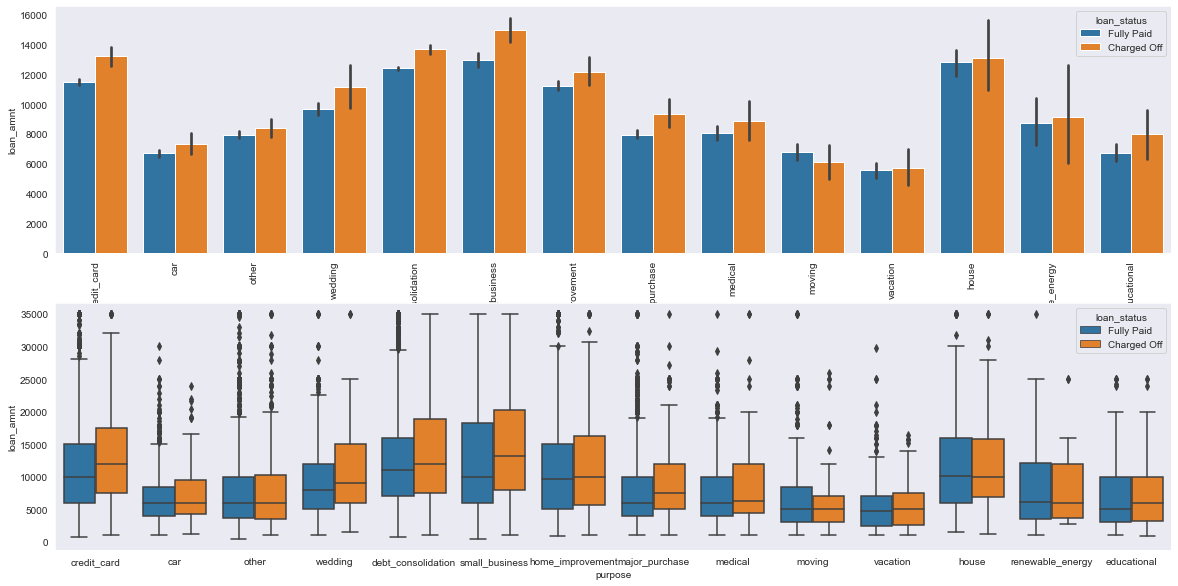

In [71]:
#Box Plot Mean of  Purpose and Loan Status in regards with Loan Amount
lending_Puspose_status_loanamnt_crosstab = pd.crosstab(lending_df.purpose, lending_df.loan_status, values=lending_df.loan_amnt, aggfunc='mean').round(0)
plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data=lending_df  ,  estimator=np.mean)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= lending_df)
plt.show()

__Observation__ : High loan amount provided to Small Business and Housing Loans

loan_status  Charged Off  Fully Paid
dti_bin                             
(0, 6]               698        5204
(6, 12]             1265        8540
(12, 18]            1649        9333
(18, 24]            1411        7168
(24, 30]             246        1358
loan_status  charged_off_perc  fully_paid_perc
dti_bin                                       
(0, 6]                  11.83            88.17
(6, 12]                 12.90            87.10
(12, 18]                15.02            84.98
(18, 24]                16.45            83.55
(24, 30]                15.34            84.66


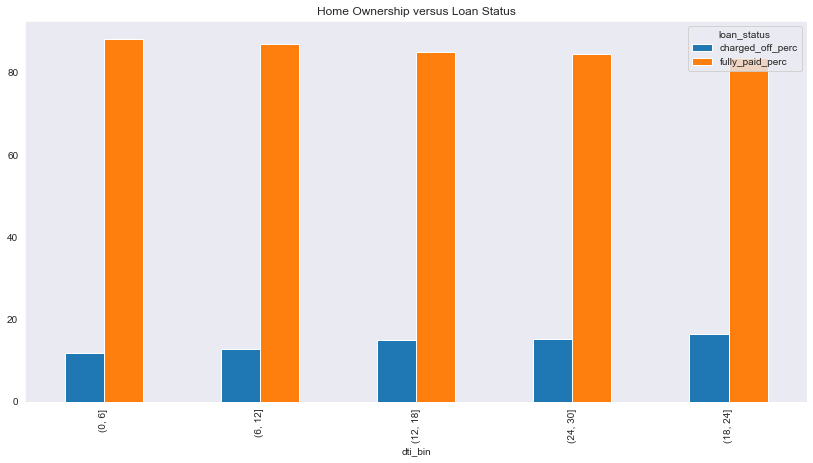

In [72]:
#Since both Home Ownership and Loan are Catagorical we need to identify the % using Cross Tabulation 
lending_status_homeown_crosstab = pd.crosstab(lending_df['dti_bin'], lending_df['loan_status'])
print(lending_status_homeown_crosstab)
lending_status_homeown_crosstab['sum_of_loan_status'] = lending_status_homeown_crosstab['Charged Off'] + lending_status_homeown_crosstab['Fully Paid']
lending_status_homeown_crosstab['charged_off_perc'] = round((lending_status_homeown_crosstab['Charged Off']/lending_status_homeown_crosstab.sum_of_loan_status)*100, 2)
lending_status_homeown_crosstab['fully_paid_perc'] = round((lending_status_homeown_crosstab['Fully Paid']/lending_status_homeown_crosstab.sum_of_loan_status)*100, 2)
lending_status_homeown_crosstab.drop(columns=['Charged Off', 'Fully Paid' , 'sum_of_loan_status'], inplace=True)
print(lending_status_homeown_crosstab)
lending_status_homeown_crosstab.sort_values(by='charged_off_perc').plot.bar(stacked=False, figsize=(14,7),  title='Home Ownership versus Loan Status')
plt.show()

__Observation__ : No much difference in % in regards to CHarged off Vs DTI bins

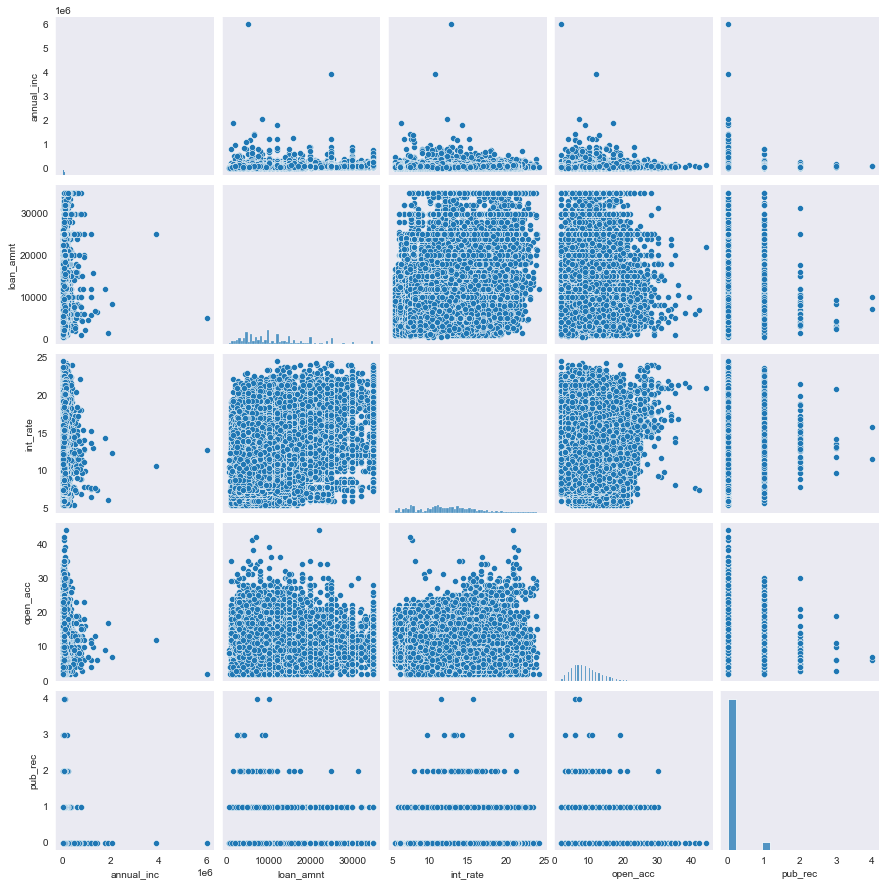

In [73]:
#Pair Plot in regards to remaining other Columns Loan Amount , Intreset Rate , Open Account , Anaul Income and Deg. Public Rec
sns.pairplot(lending_df[['annual_inc','loan_amnt','int_rate','open_acc','pub_rec']])
plt.show()

### 5.Segmented Variable Analyis

In [74]:
#Finding which Loans under Charged Off users who stay in Mortgage 
lending_df.purpose[(lending_df['home_ownership'] != 'MORTGAGE') & (lending_df.loan_status == 'Charged Off')].value_counts()

debt_consolidation    1537
other                  415
credit_card            280
small_business         241
major_purchase         140
car                     90
moving                  77
home_improvement        67
medical                 60
wedding                 58
educational             41
vacation                39
house                   38
renewable_energy        10
Name: purpose, dtype: int64

__Observation__ : Company should consider to lend loans to users staying in Mortgage apart from Home , Home Improvement and Medical

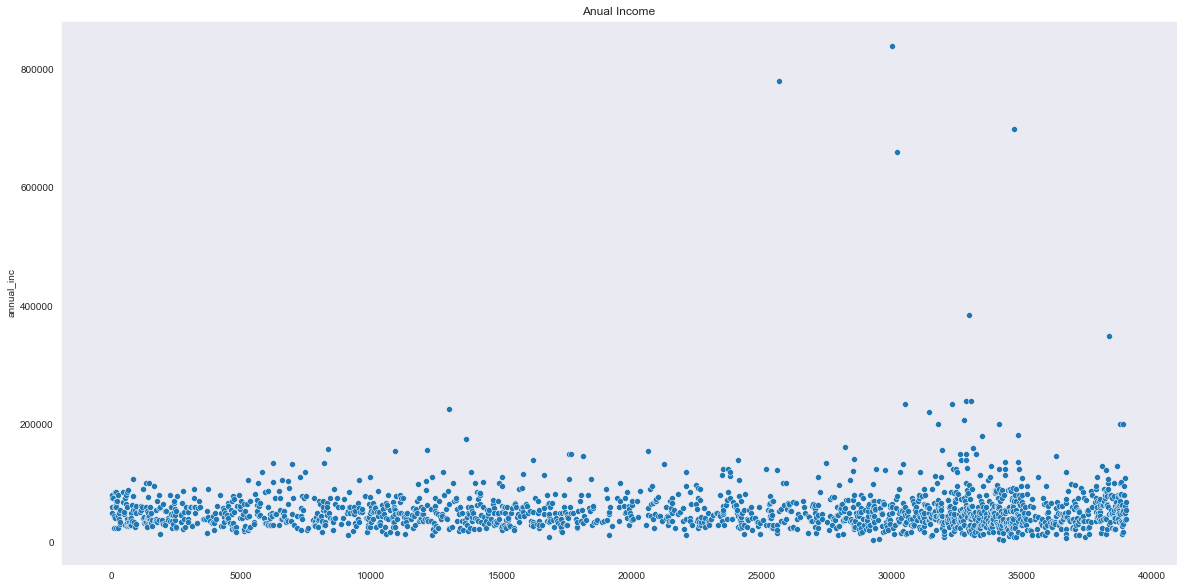

In [75]:
#For Charged Off - Not verified users and Public Reported Bankruptcies the Annual Income scattered Plot
plt.figure(figsize=(20,10))
sns.scatterplot(data=lending_df.annual_inc[(lending_df['pub_rec_bankruptcies'] == 0) & (lending_df.verification_status=="Not Verified") & (lending_df.loan_status == 'Charged Off')])
plt.title("Anual Income" , fontsize=12)
plt.show()

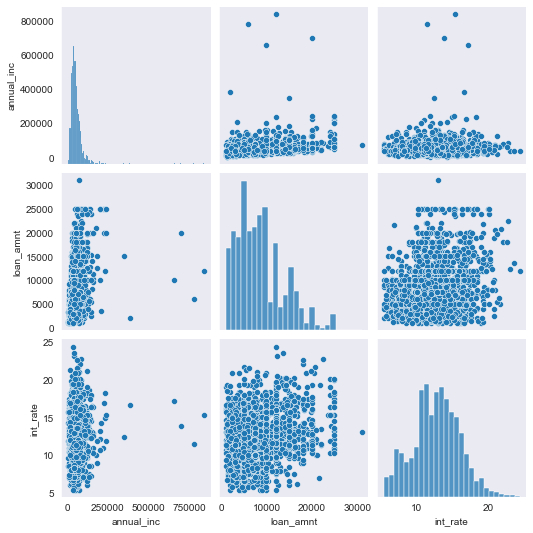

In [76]:
#Pair Plot for  Charged Off - Not verified users and Public Reported Bankruptcies the Annual Income scattered Plot
sns.pairplot(lending_df[(lending_df['pub_rec_bankruptcies'] == 0) & (lending_df.verification_status=="Not Verified") & (lending_df.loan_status == 'Charged Off') ][['annual_inc','loan_amnt','int_rate']])
plt.show()

__Observation__ : Company should consider the Verification Status before lending high amount loan . Looks like based on high Anual Income company is lending High Loan Amount

In [77]:
#Excluding Outliners 
lending_exOut_df=lending_df[lending_df['annual_inc'] < 150000]
lending_exOut_df.annual_inc.max()

149981.0

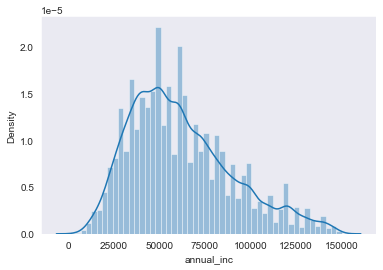

In [78]:
sns.distplot(lending_exOut_df['annual_inc'])
plt.show()

__Observation__ : Majority of users have Anual Income between 30,000-70,000

In [79]:
#Creating Annual Income Bins
anual_income_bins = create_bins_val(round(lending_exOut_df.annual_inc.min()),round(lending_exOut_df.annual_inc.max()),10)
print(anual_income_bins[0])

[4000, 18598, 33196, 47794, 62392, 76990, 91588, 106186, 120784, 135382, 149980]


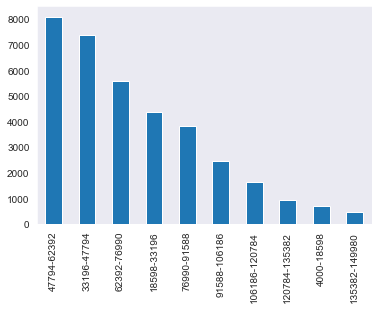

In [80]:
lending_exOut_df['anual_income_bin'] = pd.cut(lending_exOut_df['annual_inc'],anual_income_bins[0],labels=anual_income_bins[1][:-1])
lending_exOut_df['anual_income_bin'].value_counts().plot.bar()
plt.show()

__Observation__ : Majority of Charged off users have Anual Income between 48,000 - 63,000

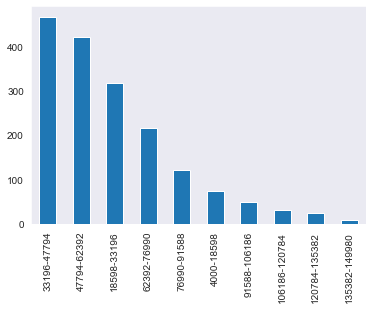

In [81]:
lending_exOut_df['anual_income_bin'][(lending_exOut_df['pub_rec_bankruptcies'] == 0) & (lending_exOut_df.verification_status=="Not Verified") & (lending_exOut_df.loan_status == 'Charged Off') ].value_counts().plot.bar()
plt.show()

__Observation__ : Majority of Not Verified having 0 bankrupty reportd Charged off users have Anual Income between 33,000-48,000

### 6. Multivariate Analysis

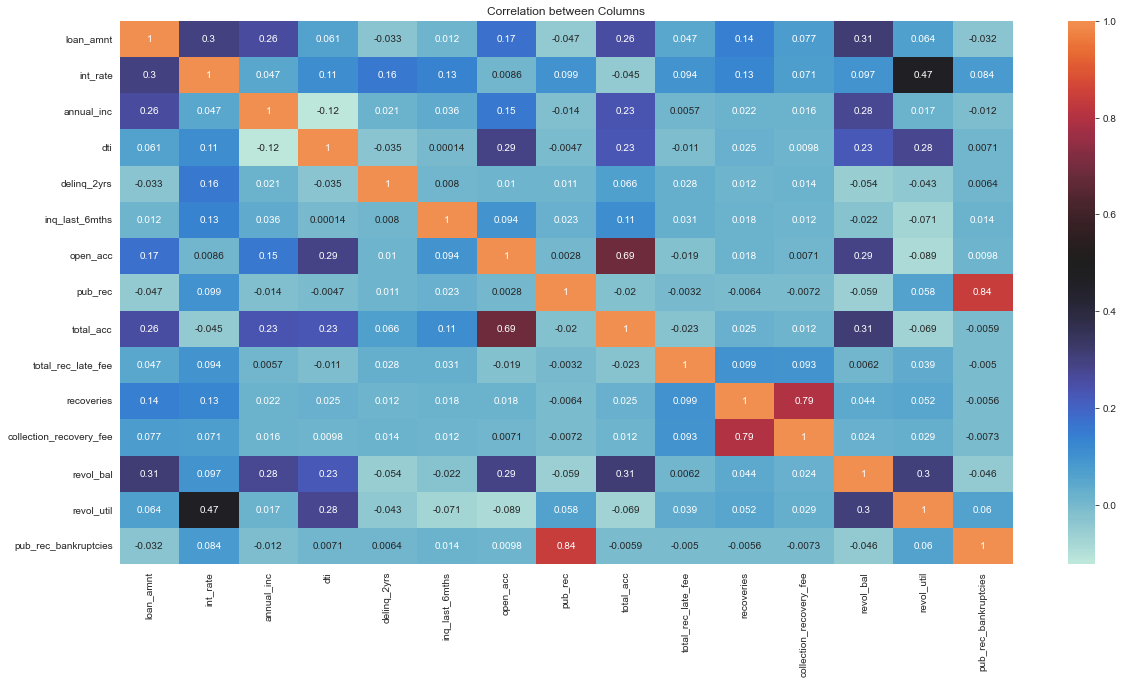

In [82]:
#Correlation Matrix
plt.figure(figsize=(20,10))
cont_var= ['loan_amnt', 'int_rate','emp_length', 'annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','total_rec_late_fee','recoveries','collection_recovery_fee','revol_bal','revol_util','pub_rec_bankruptcies']
corr = lending_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.title("Correlation between Columns")
plt.show()

__Observation__:<br>

loan_amnt revol_bal are correlated with r factor .31 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.

### Conclusions & Recommendations

- NV and AK states have high percentage of defaulters . Company needs to take extra caution while providing loan.
- Majority of the people have took the 36 months tenure period
- Regarding Mortgage customers company is loaning higher amount for purpose not associated to House , company needs to take extra caution as they do already need to pay Mortgage amount along with other credit accounts 
- Majority of the people who applied for the loan are living on rent or mortgage
- People having less income are more likely to default.
- As the loan amount is high for Small Business and Housing , lot of defaulters are under it hence company need to produce new strategy to tackle these customers by taking more stake regarding their business or house. 
- As the grades gets lower, charge off rate increases proportionately.
- Higher the dti,more likely the charge off
- As number of bankruptcies increases the charge off rate also increases
- We see a greater number of Not Verified defaulters requested loan for Medical purpose as it can't be denied , company should think to lower the interest rate for these loans so small instalments can easily be paid .
- The interest rate in charged off were higher than that of fully paid which may infer that higher interest rate could result in higher charge offs
- Company should not be providing Higher Loan amount for Not Verified customers except for Medical purpose.
- Company needs to ramp up Verification status as  43% of customers are not verified and it's a risk in lending loans without performing proper background verifications 